In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Reading the automobile consulting company file on which analysis needs to be done
cardata=pd.read_csv('CarPrice_Assignment.csv')
print(cardata.shape)# shape of the data
cardata.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
cardata = cardata.drop(columns= 'car_ID')

In [5]:
# Find distinct/nunique values from DataFrame
for feature in cardata.columns[:]:
    print(feature,':',len(cardata[feature].unique()),'levels')

symboling : 6 levels
CarName : 147 levels
fueltype : 2 levels
aspiration : 2 levels
doornumber : 2 levels
carbody : 5 levels
drivewheel : 3 levels
enginelocation : 2 levels
wheelbase : 53 levels
carlength : 75 levels
carwidth : 44 levels
carheight : 49 levels
curbweight : 171 levels
enginetype : 7 levels
cylindernumber : 7 levels
enginesize : 44 levels
fuelsystem : 8 levels
boreratio : 38 levels
stroke : 37 levels
compressionratio : 32 levels
horsepower : 59 levels
peakrpm : 23 levels
citympg : 29 levels
highwaympg : 30 levels
price : 189 levels


In [6]:
cardata.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Correct dtype

In [7]:
cardata['symboling']=cardata['symboling'].astype('category')
cardata['fueltype']=cardata['fueltype'].astype('category')
cardata['aspiration']=cardata['aspiration'].astype('category')
cardata['carbody']=cardata['carbody'].astype('category')
cardata['drivewheel']=cardata['drivewheel'].astype('category')
cardata['enginelocation']=cardata['enginelocation'].astype('category')
cardata['enginetype']=cardata['enginetype'].astype('category')
cardata['fuelsystem']=cardata['fuelsystem'].astype('category')

***

In [8]:
#Splitting company name from CarName column & insert to DataFrame
CompanyName = cardata['CarName'].apply(lambda x : x.split(' ')[0])
cardata.insert(0,'CompanyName',CompanyName)
cardata.drop(columns='CarName',inplace=True)
cardata['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
cardata['CompanyName']=cardata['CompanyName'].replace({'maxda': 'mazda',
                                                        'Nissan': 'nissan', 
                                                        'porcshce': 'porsche', 
                                                        'toyouta': 'toyota', 
                                                        'vokswagen': 'volkswagen', 
                                                        'vw': 'volkswagen'})
cardata['CompanyName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
cardata['cylindernumber'] =cardata['cylindernumber'].replace({'eight':8,
                                                           'five':5,
                                                           'six':6,
                                                           'four':4,
                                                           'three':3,
                                                           'twelve':12,
                                                           'two':2})
cardata['cylindernumber'].unique()
cardata['cylindernumber']=cardata['cylindernumber'].astype('category')

In [11]:
cardata['doornumber']=cardata['doornumber'].replace({'two':2,
                                                     'four':4})
cardata['doornumber']=cardata['doornumber'].astype('category')

In [12]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
CompanyName         205 non-null object
symboling           205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-nul

In [13]:
# Check Duplicate
cardata.loc[cardata.duplicated()]

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
# Check NA Values
cardata.isna().sum()

CompanyName         0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

***

# Visualizing TheData

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


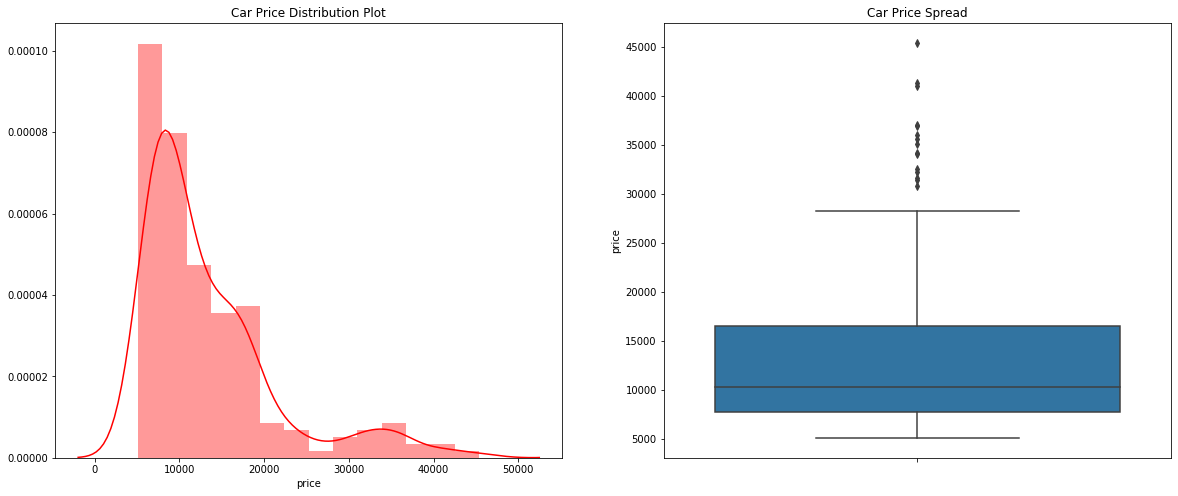

In [15]:
plt.figure(figsize=(20,8))
#Plt.subplot(nrows,ncols,plot_number)
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cardata['price'],color='r')

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cardata['price'])

print(cardata.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

**1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are Below 16,503.**

**2. The data points are far spread out from the mean, which indicates a high variance in the car prices.**

**3. (85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)**

***

### Visualizing Categorical Data

Text(0.5, 1.0, 'Car Type')

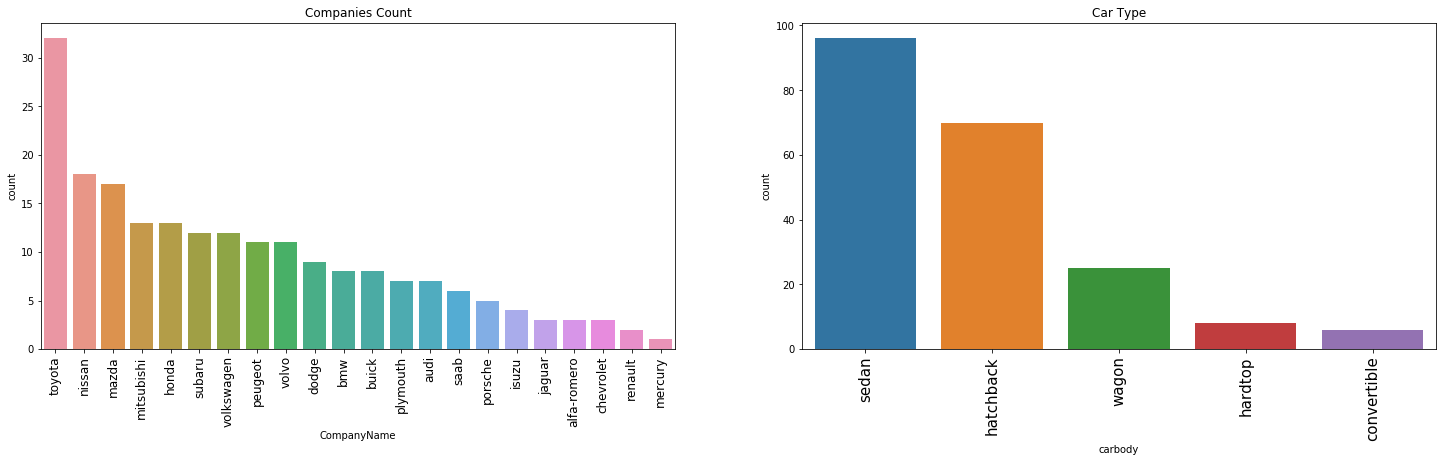

In [16]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
sns.countplot(x='CompanyName',data=cardata,order = cardata['CompanyName'].value_counts().index)
plt.xticks(rotation = 'vertical',size = 12)
plt.title('Companies Count')

plt.subplot(1,2,2)
sns.countplot(x='carbody',data=cardata,order = cardata['carbody'].value_counts().index)
plt.xticks(rotation = 'vertical',size = 15)
plt.title('Car Type')

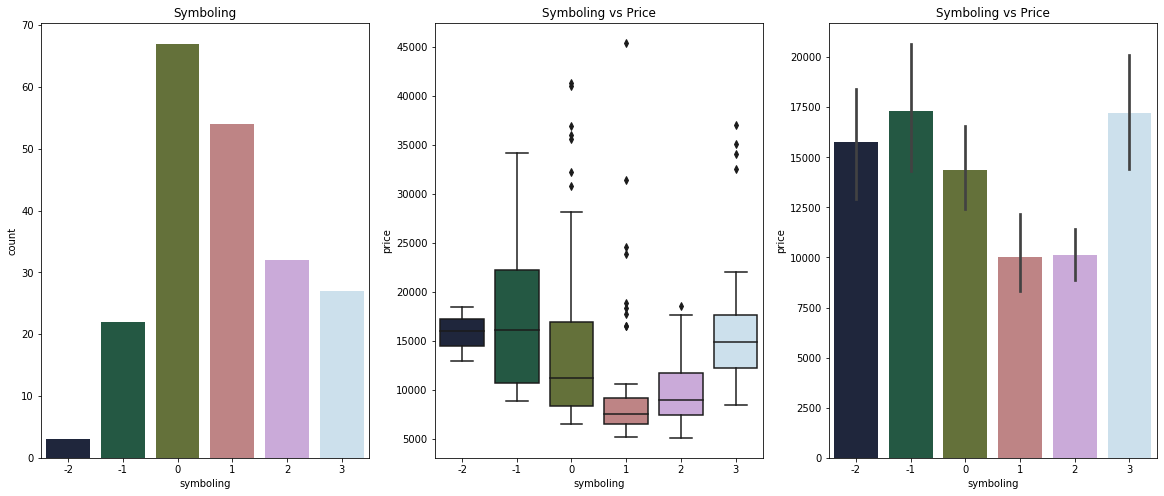

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Symboling')
sns.countplot(x='symboling',data=cardata, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('Symboling vs Price')
sns.boxplot(x='symboling', y='price',data=cardata, palette=("cubehelix"))

plt.subplot(1,3,3)
plt.title('Symboling vs Price')
sns.barplot(x='symboling',y='price',data=cardata,palette=("cubehelix"))

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. 
3. There is a dip in price at symboling 1


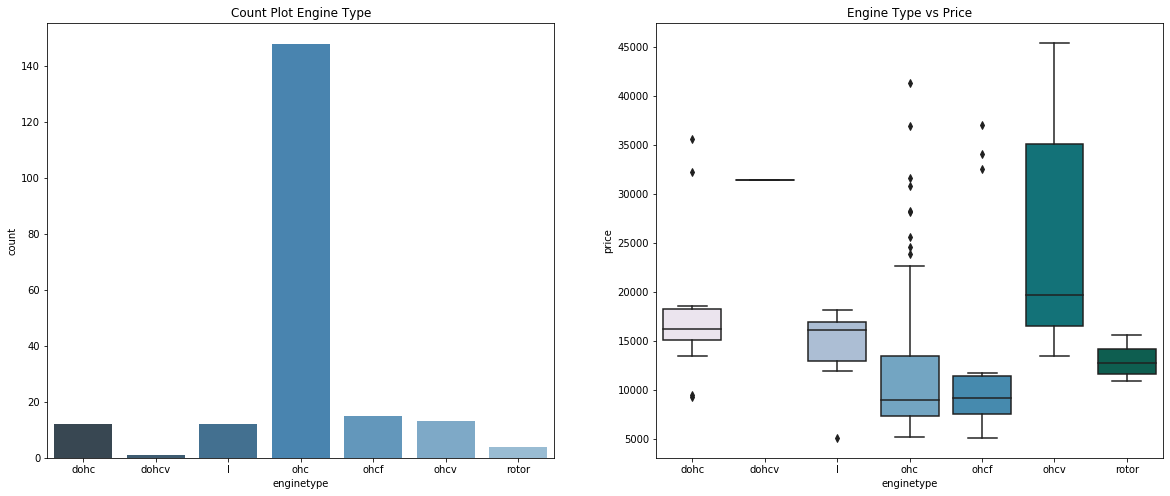

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Count Plot Engine Type')
sns.countplot(x='enginetype',data=cardata,palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x='enginetype', y='price',data=cardata, palette=("PuBuGn"))

1. Ohcv Engine used in price range of 15k - 35k
2. ohc Engine type seems to be most favored type.
3. ohc and ohcf budget price engines
4. ohcv has the highest price range

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

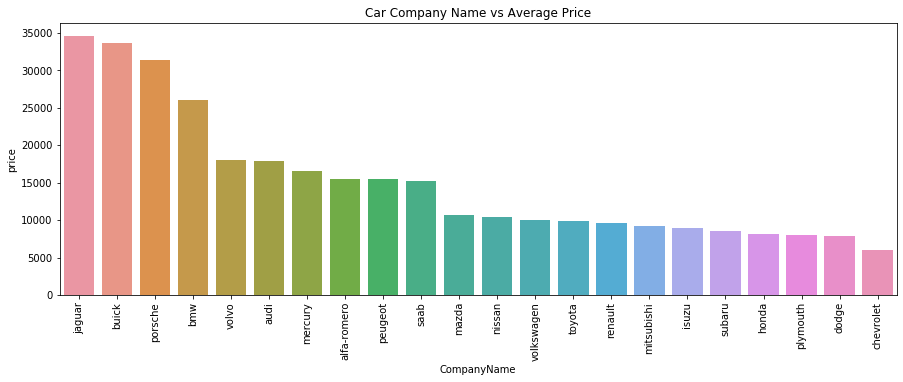

In [19]:
plt.figure(figsize=(15,5))
df_auto = cardata.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False).reset_index()
sns.barplot(x='CompanyName',y='price',data=df_auto)
plt.title('Car Company Name vs Average Price')
plt.xticks(rotation='vertical',size=10)

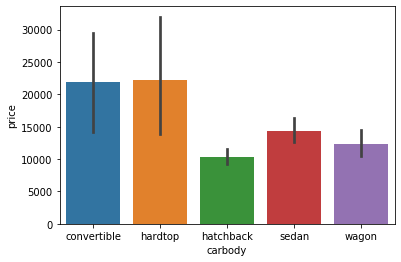

In [20]:
df_carbody = cardata.groupby(['carbody'])['price'].mean().reset_index()
sns.barplot(x='carbody',y='price',data=cardata)

1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.


Text(0.5, 1.0, 'Fuel Type')

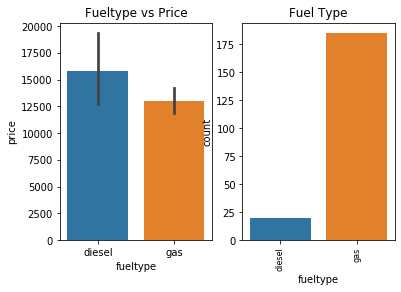

In [26]:
plt.subplot(1,2,1)
sns.barplot(x='fueltype',y='price',data=cardata)
plt.title('Fueltype vs Price')

plt.subplot(1,2,2)
sns.countplot(x='fueltype',data=cardata)
plt.xticks(rotation = 'vertical',size = 8)
plt.title('Fuel Type')

1. by countplot gas fueltype car is most favorable
2. Diesel fueltype car has higher price than gas 

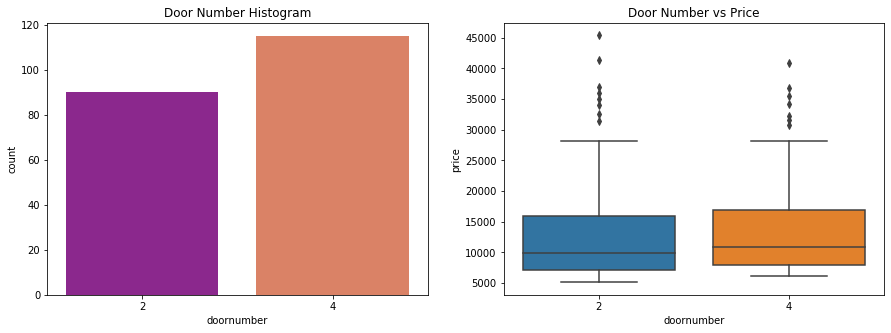

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data=cardata,x='doornumber', palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x='doornumber',y='price',data=cardata)